# 1. Import Library

In [279]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [280]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

前一個訓練中confusion matrix中非對角線且非0的元素所對應的照片index

In [281]:
# # sample code 中confusion matrix 有問題的index
# remove_idx = [1621, 8325, 6597, 6651, 3073, 900, 2182, 2018, 321, 583, 659, 4176, 9664, 9839, 4740, 5955, 247, 1112, 4265, 2043, 3534, 740, 1242, 2130, 4860, 3558, 340, 1393, 2035, 2597, 2970, 3157, 5937, 4763, 9729, 9749, 9770, 5997, 3422, 2135, 2654, 625, 3520, 1014, 1182, 2454, 2995, 1260, 1039, 1226, 9009, 9015, 3451, 4238, 3808, 1522, 2896, 582, 6625, 1878, 8408, 1530, 947, 2387, 1247, 1709, 4284, 6571, 1232, 1901, 3985, 4761, 2939, 4163, 9642]

讀取mnist資料

In [282]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

刪除前一個訓練中confusion matrix中有問題的照片index

In [283]:
# # Remove the specified indices from the arrays
# x_Train = np.delete(x_Train, remove_idx, axis=0)
# y_Train = np.delete(y_Train, remove_idx, axis=0)

# # Verify the shapes of the new arrays
# print('x_train shape:', x_Train.shape)
# print('y_train shape:', y_Train.shape)

將features 轉換為4維矩陣

In [284]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

將features 標準化

In [285]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

labal 以onehot encoding轉換

In [286]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

匯入模組

In [287]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

建立keras的sequential

In [288]:
model = Sequential()

建立卷積層1

In [289]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

建立池化層1

In [290]:
model.add(MaxPooling2D(pool_size=(2, 2)))

建立卷積層2

In [291]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

建立池化層2

In [292]:
model.add(MaxPooling2D(pool_size=(2, 2)))

加入Dropout 避免overfitting

In [293]:
model.add(Dropout(0.25))

建立神經網路(平坦層、隱藏層、輸出層)


建立平坦層

In [294]:
model.add(Flatten())

建立隱藏層

In [295]:
model.add(Dense(128, activation='relu'))

In [296]:
model.add(Dropout(0.5))

建立輸出層

In [297]:
model.add(Dense(10,activation='softmax'))

查看模型

In [298]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 36)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 36)          0         
                                                                 
 flatten_5 (Flatten)         (None, 1764)             

# 訓練模型

定義訓練

In [299]:
# define the hyper parameter
lr = 0.01
epoch_num = 100

In [300]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy',
              optimizer=opt ,metrics=['accuracy']) 

use schedular to modulat the learning rate.

In [301]:
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    print(lr)
    if epoch%10 == 0:
        return lr * 0.1
    else:
        return lr 

lr_scheduler = LearningRateScheduler(scheduler)



開始訓練

In [302]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,
                        validation_split=0.2, 
                        epochs=epoch_num, 
                        batch_size=300,
                        verbose=2,
                        callbacks=[lr_scheduler])

0.009999999776482582
Epoch 1/100
160/160 - 3s - loss: 0.4975 - accuracy: 0.8446 - val_loss: 0.1066 - val_accuracy: 0.9670 - lr: 1.0000e-03 - 3s/epoch - 21ms/step
0.0009999999310821295
Epoch 2/100
160/160 - 1s - loss: 0.1508 - accuracy: 0.9555 - val_loss: 0.0725 - val_accuracy: 0.9781 - lr: 1.0000e-03 - 1s/epoch - 7ms/step
0.0009999999310821295
Epoch 3/100
160/160 - 1s - loss: 0.1075 - accuracy: 0.9673 - val_loss: 0.0575 - val_accuracy: 0.9828 - lr: 1.0000e-03 - 1s/epoch - 7ms/step
0.0009999999310821295
Epoch 4/100
160/160 - 1s - loss: 0.0871 - accuracy: 0.9740 - val_loss: 0.0490 - val_accuracy: 0.9852 - lr: 1.0000e-03 - 1s/epoch - 7ms/step
0.0009999999310821295
Epoch 5/100
160/160 - 1s - loss: 0.0737 - accuracy: 0.9779 - val_loss: 0.0429 - val_accuracy: 0.9872 - lr: 1.0000e-03 - 1s/epoch - 7ms/step
0.0009999999310821295
Epoch 6/100
160/160 - 1s - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.0420 - val_accuracy: 0.9878 - lr: 1.0000e-03 - 1s/epoch - 7ms/step
0.0009999999310821295
Epoch 

In [303]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

畫出訓練結果

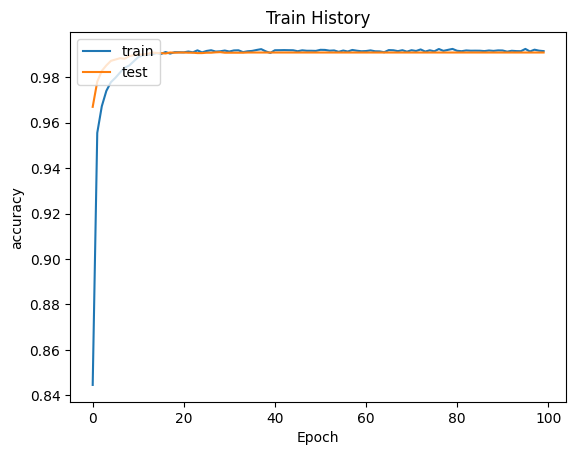

In [304]:
show_train_history('accuracy','val_accuracy')

畫出loss誤差執行結果

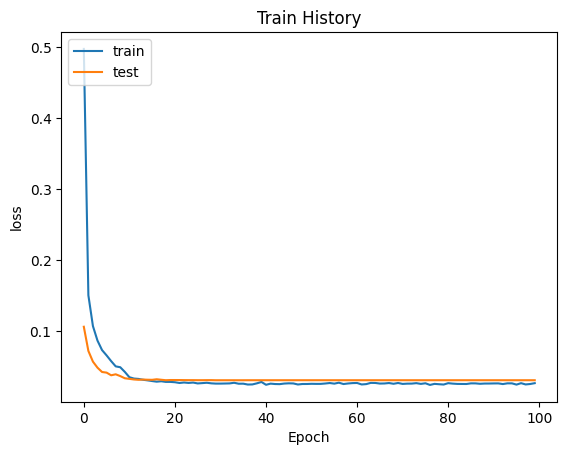

In [305]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [306]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0228 - accuracy: 0.9929


0.992900013923645

# 預測結果

In [307]:
prediction= np.argmax(model.predict(x_Test),axis=1)

313/313 [==============================] - 1s 3ms/step


In [308]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [309]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

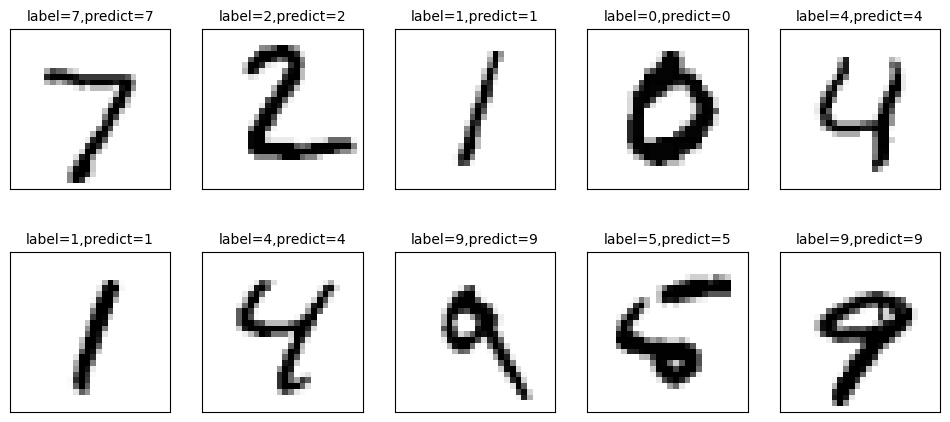

In [310]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [311]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1133,1,1,0,0,0,0,0,0
2,1,0,1029,0,0,0,0,2,0,0
3,0,0,1,1004,0,1,0,1,3,0
4,0,0,0,0,979,0,0,0,0,3
5,1,0,0,4,0,885,1,0,0,1
6,4,2,0,0,1,2,948,0,1,0
7,0,2,3,1,0,0,0,1020,1,1
8,2,1,2,2,0,1,1,3,961,1


找出confusion matrix中非對角線且非0的元素

In [312]:
confusion_matrix = pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])
err_predict = [] # 記錄混淆矩陣中非對角線且非0的元素label, predict value
# list裡面為tuple

for row_name, row_data in confusion_matrix.iterrows():
    for col_name, col_value in row_data.iteritems():
        if row_name != col_name and col_value != 0:
            err_predict.append((row_name, col_name))
            # print(row_name, col_name)



<ipython-input-312-9dff25835661>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_value in row_data.iteritems():


找出confusion matrix中非對角線且非0元素所對應到image index

In [313]:
err_idx = [] # 記錄預測錯誤照片的index
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
for i in err_predict:
  # print(i)
  error_data = df[(df.label==i[0])&(df.predict==i[1])]
  err_num = error_data.shape[0] # 取的預測錯誤的數量
  for i in range(err_num):
    err_idx.append(error_data.iloc[i].name)
print(err_idx)

[8325, 6597, 6651, 3073, 1527, 2462, 4176, 9664, 4256, 4740, 2109, 2921, 5955, 5973, 740, 2130, 9792, 3558, 1393, 2035, 2597, 5937, 9729, 5997, 445, 2118, 3422, 3853, 2135, 2654, 3520, 1014, 1182, 3762, 1260, 6576, 1226, 3767, 9009, 684, 3808, 1522, 2896, 4807, 1033, 582, 6625, 1319, 1878, 8408, 495, 1530, 4497, 4731, 947, 2293, 6505, 1232, 1901, 2720, 3869, 3985, 4823, 9587, 1709, 2939, 4163, 4224, 6571, 9692, 4761]


In [314]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [315]:
df[(df.label==5)&(df.predict==3)]


,label,predict
1393,5,3
2035,5,3
2597,5,3
5937,5,3


plot the images which is predicted error.

In [316]:
def show_error_image(label_val, predict_val):
  error_data = df[(df.label==label_val)&(df.predict==predict_val)]
  err_num = error_data.shape[0] # 取的預測錯誤的數量
  err_idx = [] # 記錄預測錯誤照片的index
  for i in range(err_num):
    err_idx.append(error_data.iloc[i].name)
  # print(err_idx)

  fig, axes = plt.subplots(nrows=1, ncols=len(err_idx), figsize=(len(err_idx), 1), sharex=True, sharey=True)
  fig.suptitle("None normalize")
  for i, ax in enumerate(axes):
      ax.imshow(x_Train[err_idx[i]], cmap='binary')
      ax.set_xticks([])
      ax.set_yticks([])  
  plt.show()

  fig, axes = plt.subplots(nrows=1, ncols=len(err_idx), figsize=(len(err_idx), 1), sharex=True, sharey=True)
  fig.suptitle("Normalized")
  for i, ax in enumerate(axes):
      ax.imshow(x_Train4D_normalize[err_idx[i]], cmap='binary')
      ax.set_xticks([])
      ax.set_yticks([])  
  plt.show()


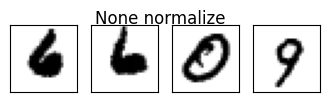

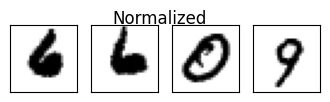

In [317]:
show_error_image(5, 3)